In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [2]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(max_results=3)
results = tool.invoke("What happened in India today?")
results

C:\Users\user\AppData\Local\Temp\ipykernel_23144\4133158293.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=3)


[{'title': 'India News, Latest Breaking News Headlines from ... - India Today',
  'url': 'https://www.indiatoday.in/india',
  'content': 'Flash floods in Himachal: 5 dead, 3 missing as rescue operations continue · Karnataka Minister hints at political shake-up, says big changes after September.',
  'score': 0.98532},
 {'title': 'India news - breaking news, video and headlines and opinion | CNN',
  'url': 'https://www.cnn.com/world/india',
  'content': 'Indian coast guard battles massive fire on container ship listing off Kerala · Carney invites Modi to G7 summit despite strained ties between Canada and India.',
  'score': 0.98185},
 {'title': 'India | Latest News & Updates - BBC',
  'url': 'https://www.bbc.com/news/world/asia/india',
  'content': 'Astronaut becomes first Indian to set foot on ISS · Sholay: Bollywood epic roars back to big screen after 50 years with new ending · Diljit Dosanjh defends new',
  'score': 0.98068}]

In [4]:
for result in results:
    print(result["title"])
    print(result["url"])
    print(result["content"])
    print(result["score"])
    print("\n")

India News, Latest Breaking News Headlines from ... - India Today
https://www.indiatoday.in/india
Flash floods in Himachal: 5 dead, 3 missing as rescue operations continue · Karnataka Minister hints at political shake-up, says big changes after September.
0.98532


India news - breaking news, video and headlines and opinion | CNN
https://www.cnn.com/world/india
Indian coast guard battles massive fire on container ship listing off Kerala · Carney invites Modi to G7 summit despite strained ties between Canada and India.
0.98185


India | Latest News & Updates - BBC
https://www.bbc.com/news/world/asia/india
Astronaut becomes first Indian to set foot on ISS · Sholay: Bollywood epic roars back to big screen after 50 years with new ending · Diljit Dosanjh defends new
0.98068




#Extraction

In [8]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader([result["url"] for result in results])
docs = loader.load()
docs

[Document(metadata={'source': 'https://www.indiatoday.in/india', 'title': 'India News, Latest Breaking News Headlines from India, Live News Updates', 'description': 'India News Today: Read latest and breaking news headlines from India. Top India News, Current headlines, videos, photos and live india news updates at India Today', 'language': 'en'}, page_content='India News, Latest Breaking News Headlines from India, Live News Updates India TodayAaj TakGNTTVLallantopBusiness TodayBanglaMalayalamNortheastBT BazaarHarper\'s BazaarSports TakCrime TakAstro TakGamingBrides TodayCosmopolitanKisan TakIshq FMIndia Today HindiReader’s DigestIndia TodayAaj TakGNTTVLallantopBusiness TodayBanglaMalayalamNortheastBT BazaarHarper\'s BazaarSports TakMagazineLive TVSearchSEARCHSIGN INEdition ININUSHome TVLive TVPrimetimeMagazineLatest EditionInsightBest CollegesLife+StyleIndiaSouthGlobalAll World NewsUS NewsCanada NewsUK NewsChina NewsIndians AbroadBusinessAll SportsIPL 2025TennisCricketFootballSports T

In [14]:
for i, doc in enumerate(docs, 1):
    print(f"Document {i}")
    print(doc.metadata)
    print()
    print(doc.page_content[2])

Document 1
{'source': 'https://www.indiatoday.in/india', 'title': 'India News, Latest Breaking News Headlines from India, Live News Updates', 'description': 'India News Today: Read latest and breaking news headlines from India. Top India News, Current headlines, videos, photos and live india news updates at India Today', 'language': 'en'}

d
Document 2
{'source': 'https://www.cnn.com/world/india', 'title': 'India news - breaking news, video and headlines and opinion | CNN', 'description': 'View the latest India news and videos, including politics, travel and business headlines.', 'language': 'en'}



Document 3
{'source': 'https://www.bbc.com/news/world/asia/india', 'title': 'India | Latest News & Updates | BBC News', 'description': 'Get all the latest news, live updates and content about India from across the BBC.', 'language': 'en-GB'}

d


In [15]:
from tavily import TavilyClient

tavily_client = TavilyClient()

In [17]:
extract_results = tavily_client.extract([result["url"] for result in results])

In [18]:
for result in extract_results["results"]:
    print(result["url"])
    print(result["raw_content"])
    print("\n")

https://www.indiatoday.in/india
India News, Latest Breaking News Headlines from India, Live News Updates


*   [India Today](https://www.indiatoday.in/ "India Today")
*   [Aaj Tak](https://www.aajtak.in/ "Aaj Tak")
*   [GNTTV](https://www.gnttv.com/ "GNTTV")
*   [Lallantop](https://www.thelallantop.com/ "Lallantop")
*   [Business Today](https://www.businesstoday.in/ "Business Today")
*   [Bangla](https://bangla.aajtak.in/ "Bangla")
*   [Malayalam](https://malayalam.indiatoday.in/ "Malayalam")
*   [Northeast](https://www.indiatodayne.in/ "Northeast")
*   [BT Bazaar](https://bazaar.businesstoday.in/ "BT Bazaar")
*   [Harper's Bazaar](https://www.harpersbazaar.in/ "Harper's Bazaar")
*   [Sports Tak](https://thesportstak.com/ "Sports Tak")
*   [Crime Tak](https://www.crimetak.in/ "Crime Tak")
*   [Astro Tak](https://www.astrotak.com/ "Astro Tak")
*   [Gaming](https://www.indiatodaygaming.com/ "Gaming")
*   [Brides Today](https://www.bridestoday.in/ "Brides Today")
*   [Cosmopolitan](https:

#Crawl

In [ ]:
crawl_results = tavily_client.crawl(url="tavily.com")

{'base_url': 'tavily.com',
 'results': [{'url': 'https://www.tavily.com/',
   'raw_content': 'Tavily\n\n[](/tavily-hero.mp4)\n\n[![Tavily](./images/logo.svg)](/)\n\n[Features](/#features)[Pricing](/#pricing)[FAQ](/#faq)[Careers](/#careers)[Use Cases](https://app.tavily.com/use-cases)[Docs](https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started)[Community](https://community.tavily.com)[Blog](https://blog.tavily.com)\n\n[Operational](https://status.tavily.com/)\n\n[Log In](https://app.tavily.com/home)[Sign Up](https://app.tavily.com/home)\n\n[![Tavily](./images/logo.svg)](/)\n\n[Features](#)[Pricing](#)[FAQ](#)[Careers](#)[Use Cases](https://app.tavily.com/use-cases) [Docs](https://docs.tavily.com/) [Community](https://community.tavily.com/) [Blog](https://blog.tavily.com/)\n\n[Operational](https://status.tavily.com/)\n\n[Log In](https://app.tavily.com/home)[Contact](/contact)\n\n# Connect Your LLM to the Web\n\nEmpowering your AI applications with real-time,   \n accurate
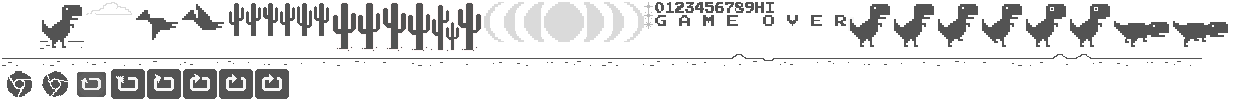
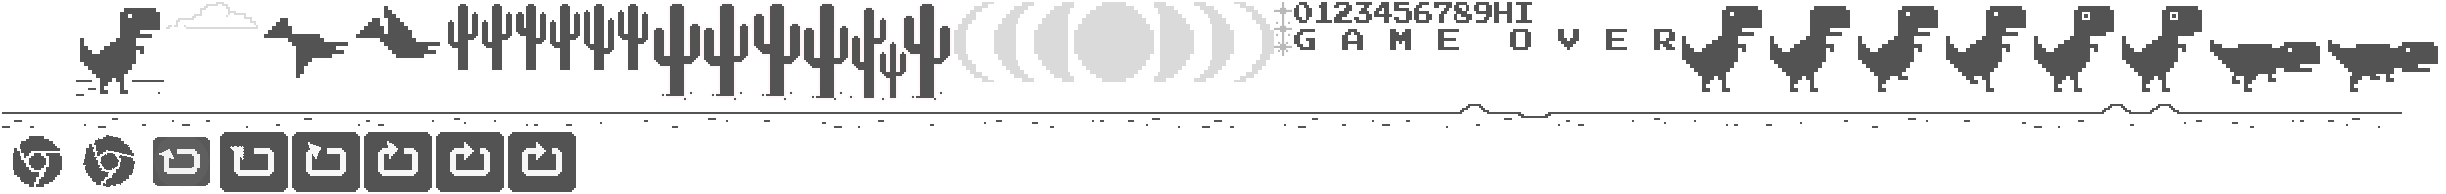

In [20]:
crawl_results

In [21]:
for result in crawl_results["results"]:
    print(result["url"])

https://www.tavily.com/
https://www.tavily.com/enterprise
https://www.tavily.com/terms
https://www.tavily.com/privacy
https://www.tavily.com/contact
https://www.tavily.com/#faq
https://www.tavily.com/#careers
https://www.tavily.com/#features
https://www.tavily.com/#pricing
https://help.tavily.com/
https://blog.tavily.com/
https://community.tavily.com/
https://status.tavily.com/
https://trust.tavily.com/
https://docs.tavily.com/
https://app.tavily.com/use-cases
https://app.tavily.com/home
https://app.tavily.com/playground
https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started


https://www.tavily.com/
Tavily

[](/tavily-hero.mp4)

[![Tavily](./images/logo.svg)](/)

[Features](/#features)[Pricing](/#pricing)[FAQ](/#faq)[Careers](/#careers)[Use Cases](https://app.tavily.com/use-cases)[Docs](https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started)[Community](https://community.tavily.com)[Blog](https://blog.tavily.com)

[Operational](https://status.tavily.com/)

[Log In](https://app.tavily.com/home)[Sign Up](https://app.tavily.com/home)

[![Tavily](./images/logo.svg)](/)

[Features](#)[Pricing](#)[FAQ](#)[Careers](#)[Use Cases](https://app.tavily.com/use-cases) [Docs](https://docs.tavily.com/) [Community](https://community.tavily.com/) [Blog](https://blog.tavily.com/)

[Operational](https://status.tavily.com/)

[Log In](https://app.tavily.com/home)[Contact](/contact)

# Connect Your LLM to the Web

Empowering your AI applications with real-time,   
 accurate search results tailored for LLMs and RAG.

[Talk to an Expert](/contact)

[Go to Playground]
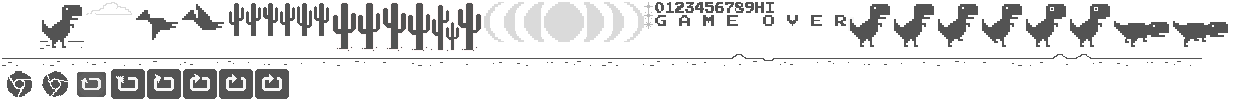
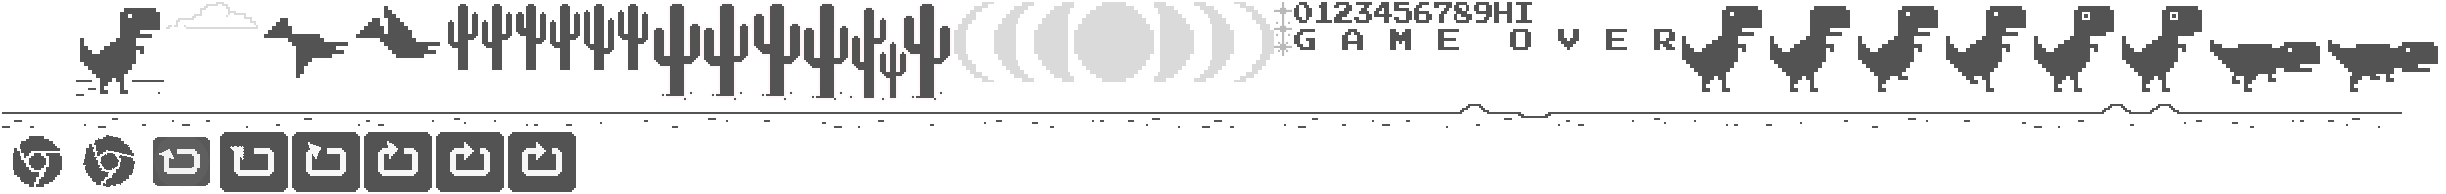

In [22]:
for result in crawl_results["results"]:
    print(result["url"])
    print(result["raw_content"])
    print("\n")

In [23]:
guided_map_results = tavily_client.map(
    url="tavily.com", instructions="find only the developer docs"
)

In [24]:
guided_map_results

{'base_url': 'tavily.com',
 'results': ['https://docs.tavily.com/documentation/rate-limits',
  'https://docs.tavily.com/documentation/best-practices/best-practices-search',
  'https://docs.tavily.com/documentation/integrations/llamaindex',
  'https://docs.tavily.com/documentation/api-reference/endpoint/crawl',
  'https://docs.tavily.com/documentation/search-crawler',
  'https://docs.tavily.com/sdk/python/quick-start',
  'https://docs.tavily.com/documentation/integrations/langchain',
  'https://docs.tavily.com/documentation/api-reference/endpoint/search',
  'https://docs.tavily.com/documentation/best-practices/best-practices-crawl',
  'https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started',
  'https://docs.tavily.com/documentation/api-reference/introduction',
  'https://docs.tavily.com/documentation/integrations/agno',
  'https://docs.tavily.com/documentation/api-credits',
  'https://docs.tavily.com/documentation/integrations/langflow',
  'https://docs.tavily.com/documen